# Fantasy Data (1970-2024)
This project uses NFL fantasy data from the 1970-2024 seasons (55 seasons total). The 55 CSV files were taken from [Pro Football Reference](https://www.pro-football-reference.com). Each CSV contains all players who were eligible for fantasy scoring in a given season.

In [220]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# display
pd.set_option('display.max_columns', None)

# function to view a player
def view_player(df, player_name):
    return df[df['Player'] == player_name]

## Combine Data
First, we'll define a function to help us combine many CSV files.

In [166]:
# define data-loading function
def load_data(file_paths, multi_header=False):
    # list to hold dfs
    dfs = []

    # read each file into a dataframe
    for file_path in file_paths:      
        # load the season into a df
        data = pd.read_csv(file_path)

        # if multi_header is True, make the first row the column names
        if multi_header:
            data.columns = data.loc[0]
            data = data.drop(0)
        
        # get year from filename and add as column
        year = file_path[-8:-4]
        data['Year'] = int(year)
        
        # add df to the list
        dfs.append(data)

    # stack dataframes together
    df = pd.concat(dfs, axis=0, ignore_index=True)

    return df

In [167]:
# get all csv files in the 'data' directory
file_paths = [os.path.join('data/fantasy_seasons', file) for file in os.listdir('data/fantasy_seasons') if file.endswith('.csv')]

The first 22 (1970.csv-1991.csv) don't contain data for recieving targets ('Rec_Tgt' in the dataframe). 

We have to load in the first 22 CSVs, combine the data, and then format the dataframe.

In [168]:
# load first 22 files
df1 = load_data(file_paths[:22], multi_header=True)

# add target column
df1['Rec_Tgt'] = np.nan

# drop 'OvRank' column
df1 = df1.drop('OvRank', axis=1)

# rename columns
df1.columns = ['OvrRank', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Pass_Cmp', 'Pass_Att', 'Pass_Yds',
       'Pass_TD', 'Pass_Int', 'Rush_Att', 'Rush_Yds', 'Rush_Y/A', 'Rush_TD', 'Rec_Rec', 'Rec_Yds', 'Rec_Y/R', 'Rec_TD',
       'Fmb', 'FmbLost', 'Tot_TD', '2PM', '2PP', 'Standard', 'PPR', 'DraftKings', 'FanDuel', 'VORP',
       'PosRank', 'Key', 'Year', 'Rec_Tgt']

# reorder columns
df1 = df1[['OvrRank', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Pass_Cmp', 'Pass_Att', 'Pass_Yds',
       'Pass_TD', 'Pass_Int', 'Rush_Att', 'Rush_Yds', 'Rush_Y/A', 'Rush_TD', 'Rec_Tgt', 'Rec_Rec', 'Rec_Yds', 'Rec_Y/R', 'Rec_TD',
       'Fmb', 'FmbLost', 'Tot_TD', '2PM', '2PP', 'Standard', 'PPR', 'DraftKings', 'FanDuel', 'VORP',
       'PosRank', 'Key', 'Year']]

Now, we can load in the final 33 CSVs (1992.csv-2024.csv) and concatenate them with the first dataframe.

In [169]:
# load final 33 files
df2 = load_data(file_paths[22:], multi_header=True)

# drop 'OvRank' column
df2 = df2.drop('OvRank', axis=1)

# rename columns
df2.columns = ['OvrRank', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Pass_Cmp', 'Pass_Att', 'Pass_Yds',
       'Pass_TD', 'Pass_Int', 'Rush_Att', 'Rush_Yds', 'Rush_Y/A', 'Rush_TD', 'Rec_Tgt', 'Rec_Rec', 'Rec_Yds', 'Rec_Y/R', 'Rec_TD',
       'Fmb', 'FmbLost', 'Tot_TD', '2PM', '2PP', 'Standard', 'PPR', 'DraftKings', 'FanDuel', 'VORP',
       'PosRank', 'Key', 'Year']

In [170]:
# create master df
df = pd.concat([df1, df2], axis=0, ignore_index=True)
del df1, df2

In [171]:
# check df
print(df.shape)
df.head()

(29369, 34)


,OvrRank,Player,Tm,Pos,Age,G,GS,Pass_Cmp,Pass_Att,Pass_Yds,...,2PM,2PP,Standard,PPR,DraftKings,FanDuel,VORP,PosRank,Key,Year
0,1,Ron Johnson*+,NYG,RB,23,14,14,0,0,0,...,NaN,NaN,218,266.4,274.9,242.4,135,1,JohnRo02,1970
1,2,Gene Washington*+,SFO,WR,23,13,13,0,0,0,...,NaN,NaN,182,235.0,238.0,208.5,134,1,WashGe00,1970
2,3,MacArthur Lane*,STL,FB,28,14,14,0,0,0,...,NaN,NaN,210,242.2,249.2,226.2,126,2,LaneMa00,1970
3,4,Warren Wells*,OAK,WR,28,14,13,0,0,0,...,NaN,NaN,163,205.9,208.9,184.4,112,2,WellWa00,1970
4,5,John Brodie*+,SFO,QB,35,14,14,223,378,2941,...,NaN,NaN,208,207.5,221.0,217.5,105,1,BrodJo00,1970


## Add Columns

In [172]:
# convert numeric cols to numeric
df = df.apply(pd.to_numeric, errors='ignore')

In [173]:
# drop some columns we won't use
df = df.drop(columns=['Tot_TD', 'DraftKings', 'FanDuel'])

# add Scrimmage Yds and TD
df['Scrim_Yds'] = df['Rush_Yds'] + df['Rec_Yds']
df['Scrim_TD'] = df['Rush_TD'] + df['Rec_TD']

In [174]:
# assign default value
df['num_games'] = 0

# assign 16 games for seasons before 2021, 17 games for seasons later
df.loc[df['Year'] < 2021, 'num_games'] = 16
df.loc[df['Year'] >= 2021, 'num_games'] = 17

# use the games played to assess if a player has been injured
df['games_played_pct'] = df['G'] / df['num_games']
df['games_started_pct'] = df['GS'] / df['G']
df['games_started_pct'] = df['games_started_pct'].fillna(0)

In [175]:
# view df
df.head()

,OvrRank,Player,Tm,Pos,Age,G,GS,Pass_Cmp,Pass_Att,Pass_Yds,...,PPR,VORP,PosRank,Key,Year,Scrim_Yds,Scrim_TD,num_games,games_played_pct,games_started_pct
0,1,Ron Johnson*+,NYG,RB,23,14,14,0,0,0,...,266.4,135.0,1,JohnRo02,1970,1514,12,16,0.8750,1.000000
1,2,Gene Washington*+,SFO,WR,23,13,13,0,0,0,...,235.0,134.0,1,WashGe00,1970,1100,12,16,0.8125,1.000000
2,3,MacArthur Lane*,STL,FB,28,14,14,0,0,0,...,242.2,126.0,2,LaneMa00,1970,1342,13,16,0.8750,1.000000
3,4,Warren Wells*,OAK,WR,28,14,13,0,0,0,...,205.9,112.0,2,WellWa00,1970,969,11,16,0.8750,0.928571
4,5,John Brodie*+,SFO,QB,35,14,14,223,378,2941,...,207.5,105.0,1,BrodJo00,1970,29,2,16,0.8750,1.000000


We can see that the 'Player' column contains the special characters '*' and '+'. These are used to indicate Pro Bowl and All-Pro selections respectively.

In [176]:
# add 'ProBowl' column if '*' in 'Player'
df['ProBowl'] = df['Player'].apply(lambda x: True if '*' in x else False)

# add 'AllPro' column if '+' in 'Player'
df['AllPro'] = df['Player'].apply(lambda x: True if '+' in x else False)

# remove '*' and '+' from 'Player' column
df['Player'] = df['Player'].apply(lambda x: x.replace('*', '').replace('+', ''))

In [177]:
# look at unique positions
df['Pos'].unique()

array(['RB', 'WR', 'FB', 'QB', 'TE'], dtype=object)

Also, 'FB' position values will be replaced with 'RB', as they both occupy the RB position in fantasy lineups.

In [178]:
# replace FB with RB in 'Pos' column
df['Pos'] = df['Pos'].apply(lambda x: 'RB' if x == 'FB' else x)

### Years of Experience

Here we will add a feature '__experience__' to represent the player's years of experience. For example, a rookie player would have exp=0.

First, we need to estimate experience for the 1970 players. Most of these players are not rookies. After manually inspecting the 1970 season on [Pro Football Reference](https://www.pro-football-reference.com/years/1970/fantasy.htm), it seems like the majority of rookies in that season were __22 years old__. This makes sense (4 years of college was the norm back then). Thus, we will assume that 1970 players were 22 their rookie season in order to estimate their years of experience.

In [179]:
# create column 'exp' for years of experience
df['Exp'] = np.nan

# estimate value
rookie_age = 22

# 'exp' for 1970 players will be 'Age' - 22
df.loc[df['Year'] == 1970, 'Exp'] = df.loc[df['Year'] == 1970, 'Age'] - rookie_age

# check
df.loc[df['Year'] == 1970, ['Player', 'Age', 'Exp']].head()

,Player,Age,Exp
0,Ron Johnson,23,1.0
1,Gene Washington,23,1.0
2,MacArthur Lane,28,6.0
3,Warren Wells,28,6.0
4,John Brodie,35,13.0


In [180]:
# function to fill in experience column
def fill_experience(group):
    # get first experience value for a player
    first_exp = group['Exp'].iloc[0]
    
    # if value is null, set to 0 (rookie season)
    if pd.isna(first_exp):
        first_exp = 0
    
    # define range of years to fill each player's experience column
    experience = range(int(first_exp), int(first_exp) + len(group))
    group['Exp'] = list(experience)
    return group

# ensure we are sorted by year
df = df.sort_values('Year')

# group by unique player identifier 'Key' and fill experience values
df = df.groupby('Key').apply(fill_experience).reset_index(drop=True)

# check Patrick Mahomes
df[df['Player'] == 'Patrick Mahomes'][['Player', 'Year', 'Exp']]

,Player,Year,Exp
24299,Patrick Mahomes,2017,0
25285,Patrick Mahomes,2018,1
25946,Patrick Mahomes,2019,2
26550,Patrick Mahomes,2020,3
27234,Patrick Mahomes,2021,4
27887,Patrick Mahomes,2022,5
28573,Patrick Mahomes,2023,6
29188,Patrick Mahomes,2024,7


## Handle Null Values

In [181]:
# view nulls
df.isnull().sum().to_frame().T

,OvrRank,Player,Tm,Pos,Age,G,GS,Pass_Cmp,Pass_Att,Pass_Yds,...,Key,Year,Scrim_Yds,Scrim_TD,num_games,games_played_pct,games_started_pct,ProBowl,AllPro,Exp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
# view 2-point conversion columns
df[['2PM', '2PP']].describe().T

,count,mean,std,min,25%,50%,75%,max
2PM,1126.0,1.132327,0.390195,1.0,1.0,1.0,1.0,4.0
2PP,586.0,1.518771,0.853643,1.0,1.0,1.0,2.0,8.0


2-point conversion data is missing prior to 1994, and since it has a very little impact on fantasy scoring (1 2pt conversion per player on average), we will drop these columns here.

We will be recalculating the point-related columns, so we will drop them here as well.

In [183]:
# drop 2pt conversion cols and the cols we are recalculating
df = df.drop(columns=['2PM', '2PP', 'OvrRank', 'PosRank', 'Standard', 'PPR', 'VORP'])

- Rush_Y/A can simply be calulcated: (Rush_Yds / Rush_Att).
- Rec_Y/R can also be calculated: (Rec_Yds / Rec_Rec).

In [184]:
# recalculate per-attempt stats
df['Pass_Y/A'] = (df['Pass_Yds'] / df['Pass_Att']).fillna(0)
df['Rush_Y/A'] = (df['Rush_Yds'] / df['Rush_Att']).fillna(0)
df['Rec_Y/R'] = (df['Rec_Yds'] / df['Rec_Rec']).fillna(0)

Rec_Tgt is challenging to estimate for the players prior to 1992. To estimate # of targets for the players from 1970-1991, we first need to estimate the __catch rate__ (Receptions / Targets) for a given season. To do this, we can inspect the catch rates of other seasons.

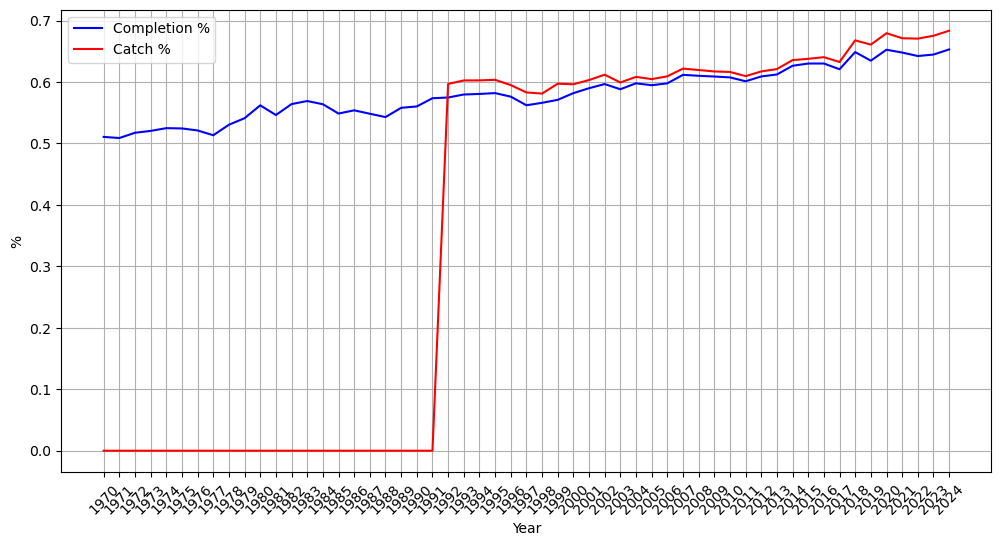

In [185]:
# initialize some lists
catch_rates = []
cmp_rates = []
years = []
diffs = []

# iterate through seasons
for (year, data) in df.groupby('Year'):
    # get catch rate for the season
    total_rec = data['Rec_Rec'].sum()
    total_tgt = data['Rec_Tgt'].sum()
    catch_rate = total_rec / total_tgt if total_tgt > 0 else 0

    # get completion percentage for the season
    total_cmp = data['Pass_Cmp'].sum()
    total_att = data['Pass_Att'].sum()
    cmp_rate = total_cmp / total_att if total_att > 0 else 0

    # calc diff
    diff = catch_rate - cmp_rate

    # append to lists
    catch_rates.append(catch_rate)
    cmp_rates.append(cmp_rate)
    years.append(year)
    diffs.append(diff)

# Plot rates
plt.figure(figsize=(12, 6))
plt.xticks(range(len(years)), years, rotation=45)
plt.plot(cmp_rates, color='blue', label='Completion %')
plt.plot(catch_rates, color='red', label='Catch %')
plt.xlabel('Year')
plt.ylabel('%')
plt.grid(True)
plt.legend()
plt.show()

- Catch rate has steadily rose from 60% to 67% in the last 10-15 years due to the more pass heavy offenses we see today. However, from 1992-2006, catch rates were steadily around __60%__.
- Completion percentage is always slightly lower than catch rate (due to balls thrown away, blocked passes, and spikes). We will also inspect the differences between catch rate and completion percentage for 1992-2023:

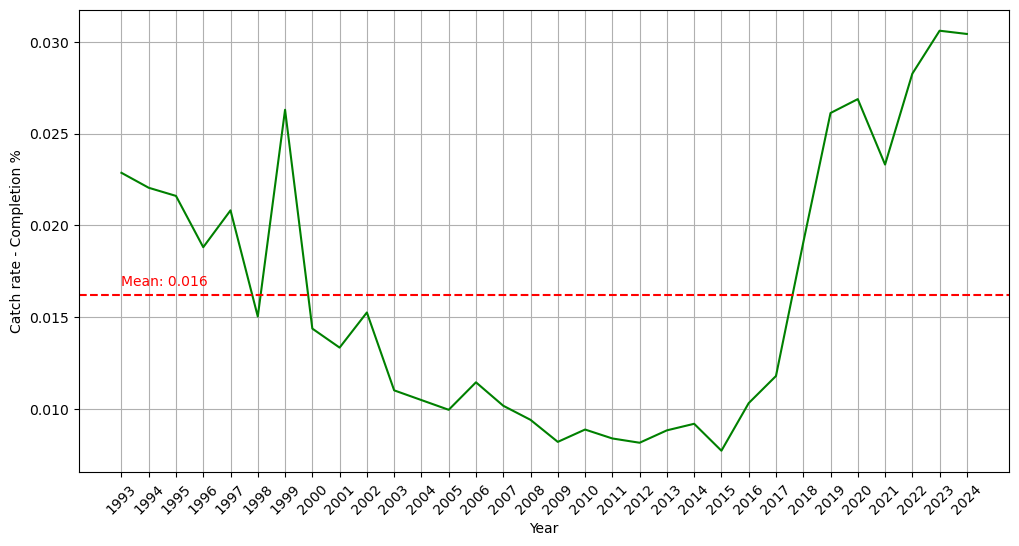

In [186]:
# view diffs
plt.figure(figsize=(12, 6))
plt.xticks(range(len(years[23:])), years[23:], rotation=45)
plt.plot(diffs[23:], color='green')
plt.xlabel('Year')
plt.ylabel('Catch rate - Completion %')
plt.grid(True)

# plot mean
plt.axhline(y=np.mean(diffs[23:]), color='r', linestyle='--')
plt.text(0, np.mean(diffs[23:]) + 0.0005, 'Mean: {:.3f}'.format(np.mean(diffs[23:])), color='r')
plt.show()

In [187]:
# mean of diffs
mean_diff = np.mean(diffs[23:])
mean_diff

0.016217631845646084

The mean differential is around __1.6%__. I will add this value to the completion percentage for the 1970-1991 seasons to estimate the __catch rate__. We will assume this catch rate for every player with a recorded reception. Then, we can divide each player's receptions by the catch rate to get __total targets__.

In [188]:
# iterate through seasons before 1992
for (year, data) in df.loc[df['Year'] < 1992].groupby('Year'):

    # get completion percentage for the season
    total_cmp = data['Pass_Cmp'].sum()
    total_att = data['Pass_Att'].sum()
    cmp_rate = total_cmp / total_att

    # calculate catch rate
    catch_rate = cmp_rate + mean_diff

    # fill 'Rec_Tgt' column by dividing receptions by catch rate
    df.loc[df['Year'] == year, 'Rec_Tgt'] = df.loc[df['Year'] == year, 'Rec_Rec'] / catch_rate

# fill rest (recievers with 0 receptions) with 0
df['Rec_Tgt'] = df['Rec_Tgt'].fillna(0)

- Since we have fumble data for all years, null Fmb (fumbles) will be filled with 0.
- Prior to 1994 we have no FmbLost. We can estimate this by calculating the average fumbles lost % for each given season.

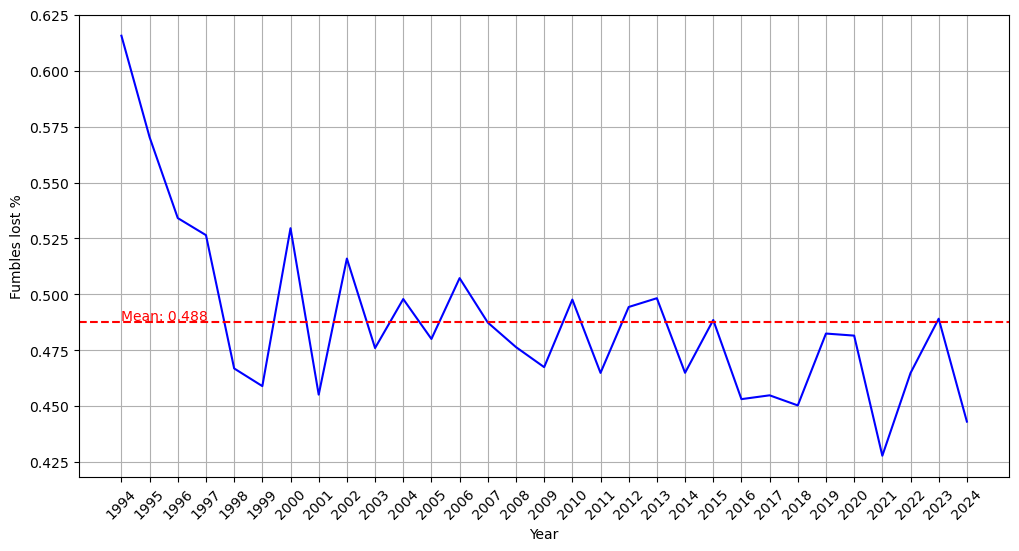

In [189]:
# fill fumbles with 0
df['Fmb'] = df['Fmb'].fillna(0)

# list for plotting
rates = []

# iterate through seasons
for (year, data) in df.loc[df['Year'] >= 1994].groupby('Year'):
    # get fumbles lost % for the season
    total_fmb = data['Fmb'].sum()
    total_fmb_lost = data['FmbLost'].sum()
    fmb_rate = total_fmb_lost / total_fmb

    # append to list
    rates.append(fmb_rate)

# plot rates
plt.figure(figsize=(12, 6))
plt.xticks(range(len(years[24:])), years[24:], rotation=45)
plt.plot(rates, color='blue')
plt.xlabel('Year')
plt.ylabel('Fumbles lost %')
plt.grid(True)

# plot mean
mean_rate = np.mean(rates)
plt.axhline(y=mean_rate, color='r', linestyle='--')
plt.text(0, mean_rate + 0.0005, 'Mean: {:.3f}'.format(mean_rate), color='r')
plt.show()

In [190]:
# mean of diffs
mean_rate

0.4877838349246299

We can see that the mean fumbles lost rate is about __49%__ from 1994-2024. Reading the plot right-to-left, it seems to be trending upward past 60% (as if prior seasons lost fumbles at a higher rate). I feel like using __55%__ as the estimate is a good middleground.

In [191]:
# fumble rate
fumble_rate = 0.55

# iterate through seasons before 1992
for (year, data) in df.loc[df['Year'] < 1994].groupby('Year'):

    # fill 'FmbLost' column by multiplying fumbles by fumble rate (55%)
    df.loc[df['Year'] == year, 'FmbLost'] = df.loc[df['Year'] == year, 'Fmb'] * fumble_rate

# fill rest (players with 0 fumbles) with 0
df['FmbLost'] = df['FmbLost'].fillna(0)

In [192]:
# view nulls once more
df.isnull().sum().sum()

0

## Volume
Now, we will add a 'Touches' column (sum of Passing, Rushing, and Receiving Attempts) to reflect the amount of volume a player had in a given season:

In [193]:
# add 'Touches' column
df['Touches'] = (df['Pass_Att'] + df['Rush_Att'] + df['Rec_Rec']).fillna(0)

## Efficiency
Now, we will add columns to reflect the efficiency a player had in a given season:
- Completion % (Pass Completions / Pass Attempts)
- Catch Rate (Receptions / Targets)

In [194]:
# add 'Cmp%' column
df['Cmp%'] = (df['Pass_Cmp'] / df['Pass_Att']).fillna(0)

In [195]:
# add 'Catch%' column
df['Catch%'] = (df['Rec_Rec'] / df['Rec_Tgt']).fillna(0)

## Per-Game Stats
We will also add normalized stats on a per-game basis.

In [196]:
# statistical columns to be normalized
stats_words = ['Pass', 'Rush', 'Rec', 'Fmb', 'Scrim', 'Touches']
stats_cols = [col for col in df.columns if any(word in col for word in stats_words) and col not in ['Pass_Y/A', 'Rush_Y/A', 'Rec_Y/R']]

# normalize stats columns per game
for col in stats_cols:
    df[col + '_per_game'] = df[col] / df['G']

    # fill nulls with 0
    df[col + '_per_game'] = df[col + '_per_game'].fillna(0)

## __Points__ and __Rankings__
We will add point columns for 4 different formats:
- __Standard__
- __Half-point PPR__
- __PPR__
- __6-point passing TDs__ (Full-point PPR as well)

We will also add __per-game__ and __per-touch__ columns for each of the 4 scoring formats. Both __overall ranks__ and __positional ranks__ will also be added here.

In [197]:
# calculate standard points
df['Points_standard'] = (df['Pass_Yds'] * 0.04) + (df['Pass_TD'] * 4) + (df['Pass_Int'] * -1) + \
    (df['Rush_Yds'] * 0.1) + (df['Rush_TD'] * 6) + \
    (df['Rec_Yds'] * 0.1) + (df['Rec_TD'] * 6) + \
    (df['FmbLost'] * -2)

# calculate half-ppr points
df['Points_half-ppr'] = df['Points_standard'] + (df['Rec_Rec'] * 0.5)

# calculate ppr points
df['Points_ppr'] = df['Points_standard'] + (df['Rec_Rec'] * 1)

# PPR scoring with 6pt passing TDs
df['Points_6'] = (df['Pass_Yds'] * 0.04) + (df['Pass_TD'] * 6) + (df['Pass_Int'] * -1) + \
    (df['Rush_Yds'] * 0.1) + (df['Rush_TD'] * 6) + \
    (df['Rec_Rec'] * 1) + (df['Rec_Yds'] * 0.1) + (df['Rec_TD'] * 6) + \
    (df['FmbLost'] * -2)

In [198]:
# list for scoring
scoring = ['standard', 'half-ppr', 'ppr', '6']

# add point-per-game columns
for scoring_type in scoring:
    df['PPG_' + scoring_type] = (df['Points_' + scoring_type] / df['G']).fillna(0)

# add point-per-touch columns
for scoring_type in scoring:
    df['PPT_' + scoring_type] = (df['Points_' + scoring_type] / df['Touches']).fillna(0)

In [199]:
# some groups we will be using
year_groups = df.groupby('Year')
pos_groups = df.groupby(['Year', 'Pos'])

# add seasonal rankings for each year group
for scoring_type in scoring:
    df['SeasonOvrRank_' + scoring_type] = year_groups['Points_' + scoring_type].transform(lambda x: x.rank(ascending=False, method='min'))

# add seasonal rankings for each position group
for scoring_type in scoring:
    df['SeasonPosRank_' + scoring_type] = pos_groups['Points_' + scoring_type].transform(lambda x: x.rank(ascending=False, method='min'))

# add ppg rankings for each year group
for scoring_type in scoring:
    df['PPGOvrRank_' + scoring_type] = year_groups['PPG_' + scoring_type].transform(lambda x: x.rank(ascending=False, method='min'))

# add ppg rankings for each position group
for scoring_type in scoring:
    df['PPGPosRank_' + scoring_type] = pos_groups['PPG_' + scoring_type].transform(lambda x: x.rank(ascending=False, method='min'))

# add ppt rankings for each year group
for scoring_type in scoring:
    df['PPTOvrRank_' + scoring_type] = year_groups['PPT_' + scoring_type].transform(lambda x: x.rank(ascending=False, method='min'))

# add ppt rankings for each position group
for scoring_type in scoring:
    df['PPTPosRank_' + scoring_type] = pos_groups['PPT_' + scoring_type].transform(lambda x: x.rank(ascending=False, method='min'))

# cast all ranking columns to int
rank_cols = [col for col in df.columns if 'Rank' in col]

### Value over Replacement Player
In a 10-team league with a standard fantasy roster:
- 1 QB
- 2 RB
- 2 WR
- 1 TE
- 1 FLEX (RB/WR/TE)

Thus, the replacement players are:
- QB10
- RB25 (assuming half the flex spots are RBs)
- WR25 (assuming half the flex spots are WRs)
- TE10

Here, I will also calculate the VORP for 12 team and 3WR leagues.

In [200]:
# define the replacement rank based on league
replacement_ranks_10 = {
    'QB': 10,
    'RB': 25,
    'WR': 25,
    'TE': 10
}

replacement_ranks_12 = {
    'QB': 12,
    'RB': 30,
    'WR': 30,
    'TE': 12
}

replacement_ranks_10_3WR = {
    'QB': 10,
    'RB': 25,
    'WR': 35,
    'TE': 10
}

replacement_ranks_12_3WR = {
    'QB': 12,
    'RB': 30,
    'WR': 42,
    'TE': 12
}



# iterate through the position groups
for (year, pos), group in pos_groups:

    # iterate through the replacement ranks
    for replacement_ranks, col_name in [(replacement_ranks_10, '10tm'), (replacement_ranks_12, '12tm'), (replacement_ranks_10_3WR, '10tm_3WR'), (replacement_ranks_12_3WR, '12tm_3WR')]:

        # iterate for both seasonal and PPG VORP
        for rank_type in ['Points', 'PPG']:

            # get the replacement rank for the current position, subtract 1 to get the index
            rank = int(replacement_ranks[pos] - 1)

            # iterate through the scoring types
            for scoring_type in scoring:

                # sort group
                group = group.sort_values(rank_type + '_' + scoring_type, ascending=False)

                # get replacement player points for the current position and scoring type
                replacement = group.iloc[rank][rank_type + '_' + scoring_type]

                # add VORP column
                df.loc[(df['Year'] == year) & (df['Pos'] == pos), rank_type + '_' + 'VORP_' + scoring_type + '_' + col_name] = df.loc[(df['Year'] == year) & (df['Pos'] == pos), rank_type + '_' + scoring_type] - replacement

In [201]:
# view only last 10 cols of df
df.iloc[:, -32:].describe()

,Points_VORP_standard_10tm,Points_VORP_half-ppr_10tm,Points_VORP_ppr_10tm,Points_VORP_6_10tm,PPG_VORP_standard_10tm,PPG_VORP_half-ppr_10tm,PPG_VORP_ppr_10tm,PPG_VORP_6_10tm,Points_VORP_standard_12tm,Points_VORP_half-ppr_12tm,...,PPG_VORP_ppr_10tm_3WR,PPG_VORP_6_10tm_3WR,Points_VORP_standard_12tm_3WR,Points_VORP_half-ppr_12tm_3WR,Points_VORP_ppr_12tm_3WR,Points_VORP_6_12tm_3WR,PPG_VORP_standard_12tm_3WR,PPG_VORP_half-ppr_12tm_3WR,PPG_VORP_ppr_12tm_3WR,PPG_VORP_6_12tm_3WR
count,29369.000000,29369.000000,29369.000000,29369.000000,29369.000000,29369.000000,29369.000000,29369.000000,29369.000000,29369.000000,...,29369.000000,29369.000000,29369.000000,29369.000000,29369.000000,29369.000000,29369.000000,29369.000000,29369.000000,29369.000000
mean,-76.231149,-87.718677,-99.330555,-102.928233,-5.004653,-5.763243,-6.497202,-6.716237,-64.916482,-75.069870,...,-5.942724,-6.161060,-58.168373,-66.742750,-75.652224,-78.820201,-3.957106,-4.539622,-5.126972,-5.328558
std,68.659841,74.358760,81.499885,86.967536,4.382335,4.792274,5.296859,5.581135,67.777474,73.854572,...,5.319830,5.623462,68.893896,74.628414,81.545694,87.070727,4.441637,4.848962,5.332035,5.634255
min,-339.740000,-339.740000,-339.740000,-392.680000,-23.109333,-23.109333,-23.109333,-27.242667,-294.440000,-294.440000,...,-23.109333,-27.242667,-294.440000,-294.440000,-294.440000,-352.440000,-22.042500,-22.073750,-22.105000,-26.230000
25%,-117.800000,-136.900000,-157.700000,-159.700000,-7.992857,-9.292208,-10.543750,-10.681250,-104.900000,-123.300000,...,-10.022857,-10.154861,-95.780000,-115.000000,-133.400000,-135.200000,-6.699167,-7.961538,-9.201299,-9.337500
50%,-82.000000,-97.900000,-112.800000,-114.480000,-5.305000,-6.309524,-7.244167,-7.342857,-71.900000,-85.700000,...,-6.811667,-6.918750,-65.700000,-78.800000,-91.900000,-92.900000,-4.318571,-5.175000,-6.018750,-6.128571
75%,-38.000000,-44.720000,-51.180000,-52.100000,-2.322500,-2.730769,-3.056250,-3.153333,-28.140000,-33.020000,...,-2.518750,-2.598000,-21.100000,-24.600000,-28.400000,-29.100000,-1.306250,-1.495714,-1.695804,-1.755238
max,270.700000,282.200000,302.900000,302.900000,17.159341,18.565179,19.826786,19.826786,294.700000,316.700000,...,19.826786,19.826786,294.700000,316.700000,329.600000,333.600000,18.658571,20.221429,21.114286,21.114286


In [202]:
# view top QB and replacement QB of 2024 (10 team, standard scoring)
df.loc[(df['Year'] == 2024) & (df['Pos'] == 'QB'), ['Player', 'Year', 'G', 'Points_standard', 'Points_VORP_standard_10tm', 'PPG_standard', 'PPG_VORP_standard_10tm']].sort_values('Points_standard', ascending=False).head(10)

,Player,Year,G,Points_standard,Points_VORP_standard_10tm,PPG_standard,PPG_VORP_standard_10tm
29157,Lamar Jackson,2024,17,432.38,126.14,25.434118,6.194118
29169,Josh Allen,2024,17,383.04,76.80,22.531765,3.291765
29162,Joe Burrow,2024,17,381.82,75.58,22.460000,3.220000
29166,Baker Mayfield,2024,17,379.80,73.56,22.341176,3.101176
29152,Jayden Daniels,2024,17,358.82,52.58,21.107059,1.867059
29147,Jared Goff,2024,17,333.46,27.22,19.615294,0.375294
29172,Bo Nix,2024,17,328.20,21.96,19.305882,0.065882
29193,Jalen Hurts,2024,15,320.12,13.88,21.341333,2.101333
29209,Sam Darnold,2024,17,319.96,13.72,18.821176,-0.418824
29180,Kyler Murray,2024,17,306.24,0.00,18.014118,-1.225882


We can see that Lamar Jackson was the top QB of 2024 (by a good margin). Kyler is the replacement level QB at rank #10. Jackson's VORP is simply how many more points he scored than Kyler in the 2024 season. This stat is useful for identifying player value.

In [203]:
# view top QB and replacement QB of 2023 (10 team, 6pt passing TDs)
df.loc[(df['Year'] == 2024) & (df['Pos'] == 'QB'), ['Player', 'Year', 'G', 'Points_6', 'Points_VORP_6_10tm', 'PPG_6', 'PPG_VORP_6_10tm']].sort_values('Points_6', ascending=False).head(10)

,Player,Year,G,Points_6,Points_VORP_6_10tm,PPG_6,PPG_VORP_6_10tm
29157,Lamar Jackson,2024,17,514.38,166.14,30.257647,7.481176
29162,Joe Burrow,2024,17,467.82,119.58,27.518824,4.742353
29166,Baker Mayfield,2024,17,461.80,113.56,27.164706,4.388235
29169,Josh Allen,2024,17,439.04,90.80,25.825882,3.049412
29152,Jayden Daniels,2024,17,408.82,60.58,24.048235,1.271765
29147,Jared Goff,2024,17,408.46,60.22,24.027059,1.250588
29209,Sam Darnold,2024,17,389.96,41.72,22.938824,0.162353
29172,Bo Nix,2024,17,387.20,38.96,22.776471,0.000000
29193,Jalen Hurts,2024,15,356.12,7.88,23.741333,0.964863
29180,Kyler Murray,2024,17,348.24,0.00,20.484706,-2.291765


With 6pt passing touchdowns, we see that Burrow and Mayfield both slide above Allen (they both had over 40 passing TDs). Lamar remains at the top in what is likely to be another MVP season.

## Target Variable
The target will be the player's fantasy points for the next season.

In [204]:
# add seasonal target cols
for scoring_type in scoring:
    # group by each player and shift the points column by 1
    df['SeasonTarget_' + scoring_type] = df.groupby('Key')['Points_' + scoring_type].shift(-1)

# add ppg target cols
for scoring_type in scoring:
    # group by each player and shift the points column by 1
    df['PPGTarget_' + scoring_type] = df.groupby('Key')['PPG_' + scoring_type].shift(-1)

# check Josh Allen
df[df['Player'] == 'Josh Allen'][['Player', 'Year', 'Exp', 'Points_ppr', 'PPG_ppr', 'SeasonTarget_ppr', 'PPGTarget_ppr']]

,Player,Year,Exp,Points_ppr,PPG_ppr,SeasonTarget_ppr,PPGTarget_ppr
25207,Josh Allen,2018,0,218.06,18.171667,291.56,18.222500
25941,Josh Allen,2019,1,291.56,18.222500,406.06,25.378750
26547,Josh Allen,2020,2,406.06,25.378750,411.58,24.210588
27225,Josh Allen,2021,3,411.58,24.210588,405.52,25.345000
27892,Josh Allen,2022,4,405.52,25.345000,404.64,23.802353
28526,Josh Allen,2023,5,404.64,23.802353,383.04,22.531765
29169,Josh Allen,2024,6,383.04,22.531765,NaN,NaN


The target variables for the 2024 season (2025 points) are null, as these haven't happened yet. We will attempt to predict these values in the next notebooks.

## PFF Data (2006-2023)
Now, we can add team-related grades acquired from [Pro Football Focus](https://www.pff.com/).

### Passing Data

In [205]:
# get all passing data files
pass_paths = [os.path.join('./data/pff_data/passing_data', file) for file in os.listdir('./data/pff_data/passing_data') if file.endswith('.csv')]

# load data
pass_df = load_data(pass_paths)

In [206]:
# add cols
pass_df['Dropback%'] = pass_df['dropbacks'] / pass_df['passing_snaps']
pass_df['Aimed_passes%'] = pass_df['aimed_passes'] / pass_df['attempts']
pass_df['Dropped_passes%'] = pass_df['drops'] / pass_df['aimed_passes']
pass_df['Batted_passes%'] = pass_df['bats'] / pass_df['aimed_passes']
pass_df['Thrown_away%'] = pass_df['thrown_aways'] / pass_df['passing_snaps']
pass_df['Pressure%'] = pass_df['def_gen_pressures'] / pass_df['passing_snaps']
pass_df['Scramble%'] = pass_df['scrambles'] / pass_df['passing_snaps']
pass_df['Sack%'] = pass_df['sacks'] / pass_df['passing_snaps']
pass_df['Pressure_to_sack%'] = pass_df['sacks'] / pass_df['def_gen_pressures']
pass_df['BTT%'] = pass_df['big_time_throws'] / pass_df['aimed_passes']
pass_df['TWP%'] = pass_df['turnover_worthy_plays'] / pass_df['aimed_passes']
pass_df['First_down%'] = pass_df['first_downs'] / pass_df['attempts']

# # drop columns
pass_df = pass_df.drop(columns=['player_id', 'position', 'team_name', 'player_game_count', 'aimed_passes', 'attempts', 'bats', 'big_time_throws', 'btt_rate', 'completion_percent', 'completions', 'declined_penalties', 'def_gen_pressures', 'drop_rate', 'drops', 'grades_offense', 'grades_run', 
                      'grades_hands_fumble', 'franchise_id', 'hit_as_threw', 'interceptions', 'penalties', 'pressure_to_sack_rate', 'qb_rating', 'sack_percent', 'sacks', 'scrambles', 'spikes', 'thrown_aways', 'touchdowns', 'turnover_worthy_plays', 'twp_rate', 'yards', 'ypa', 'first_downs'])

# add 'Pass' to the beginning of each column name
pass_df.columns = ['Pass_' + col for col in pass_df.columns]

# remove 'Pass' from 'Player' and 'Year'
pass_df['Player'] = pass_df['Pass_player']
pass_df['Year'] = pass_df['Pass_Year']
pass_df = pass_df.drop(columns=['Pass_player', 'Pass_Year'])

# check
pass_df.head()

,Pass_accuracy_percent,Pass_avg_depth_of_target,Pass_avg_time_to_throw,Pass_dropbacks,Pass_grades_pass,Pass_passing_snaps,Pass_Dropback%,Pass_Aimed_passes%,Pass_Dropped_passes%,Pass_Batted_passes%,Pass_Thrown_away%,Pass_Pressure%,Pass_Scramble%,Pass_Sack%,Pass_Pressure_to_sack%,Pass_BTT%,Pass_TWP%,Pass_First_down%,Player,Year
0,66.2,9.0,2.52,638,57.4,665,0.959398,0.951060,0.073756,0.020583,0.018045,0.243609,0.006015,0.031579,0.129630,0.037736,0.046312,0.306688,Brett Favre,2006
1,71.1,9.3,2.79,677,65.5,714,0.948179,0.939597,0.046429,0.016071,0.026611,0.343137,0.025210,0.088235,0.257143,0.042857,0.058929,0.370805,Jon Kitna,2006
2,70.5,9.5,2.51,642,71.5,675,0.951111,0.950680,0.042934,0.008945,0.020741,0.257778,0.005926,0.074074,0.287356,0.046512,0.035778,0.365646,Marc Bulger,2006
3,74.6,10.4,2.60,577,93.4,602,0.958472,0.946140,0.058824,0.013283,0.029900,0.252492,0.009967,0.023256,0.092105,0.077799,0.026565,0.439856,Peyton Manning,2006
4,78.5,7.9,2.58,584,88.6,606,0.963696,0.913357,0.081028,0.045455,0.031353,0.262376,0.018152,0.029703,0.113208,0.061265,0.035573,0.366426,Drew Brees,2006


In [208]:
# merge with df
df = df.merge(pass_df, on=['Player', 'Year'], how='left')
del pass_df

### Rushing Data

In [209]:
# get all rushing data files
rush_paths = [os.path.join('./data/pff_data/rushing_data', file) for file in os.listdir('./data/pff_data/rushing_data') if file.endswith('.csv')]

# load data
rush_df = load_data(rush_paths)

In [210]:
# add cols
rush_df['Team_Rush%'] = rush_df['attempts'] / rush_df['run_plays']
rush_df['Avoided_tackles_per_attempt'] = rush_df['avoided_tackles'] / rush_df['attempts']
rush_df['10+_yard_run%'] = rush_df['explosive'] / rush_df['attempts']
rush_df['15+_yard_run%'] = rush_df['breakaway_attempts'] / rush_df['attempts']
rush_df['15+_yard_run_yards%'] = rush_df['breakaway_yards'] / rush_df['yards']
rush_df['First_down%'] = rush_df['first_downs'] / rush_df['attempts']
rush_df['Gap%'] = rush_df['gap_attempts'] / rush_df['attempts']
rush_df['Zone%'] = rush_df['zone_attempts'] / rush_df['attempts']
rush_df['YCO_per_attempt'] = rush_df['yards_after_contact'] / rush_df['attempts']

# drop columns
rush_df = rush_df.drop(columns=['player_id', 'position', 'team_name', 'player_game_count', 'attempts', 'avoided_tackles', 'breakaway_attempts', 'breakaway_percent', 'breakaway_yards', 'declined_penalties', 'designed_yards', 'drops', 'elu_recv_mtf', 'elu_rush_mtf', 'elu_yco', 
                                'explosive', 'first_downs', 'franchise_id', 'fumbles', 'gap_attempts', 'grades_offense_penalty', 'grades_pass', 'grades_pass_block', 'grades_pass_route', 'grades_run_block', 'penalties', 'rec_yards', 'receptions', 'routes', 'scramble_yards', 
                                'scrambles', 'targets', 'total_touches', 'touchdowns', 'yards', 'yards_after_contact', 'yco_attempt', 'ypa', 'yprr', 'run_plays', 'zone_attempts'])

# add 'Rush' to the beginning of each column name
rush_df.columns = ['Rush_' + col for col in rush_df.columns]

# remove 'Rush' from 'Player' and 'Year'
rush_df['Player'] = rush_df['Rush_player']
rush_df['Year'] = rush_df['Rush_Year']
rush_df = rush_df.drop(columns=['Rush_player', 'Rush_Year'])

# check
rush_df.head()

,Rush_elusive_rating,Rush_grades_hands_fumble,Rush_grades_offense,Rush_grades_run,Rush_longest,Rush_Team_Rush%,Rush_Avoided_tackles_per_attempt,Rush_10+_yard_run%,Rush_15+_yard_run%,Rush_15+_yard_run_yards%,Rush_First_down%,Rush_Gap%,Rush_Zone%,Rush_YCO_per_attempt,Player,Year
0,42.7,85.5,59.0,60.3,47,0.922395,0.146635,0.117788,0.067308,0.344885,0.216346,0.473558,0.420673,2.670673,Larry Johnson,2006
1,32.0,82.0,73.0,71.5,85,0.802784,0.106936,0.121387,0.066474,0.397018,0.231214,0.589595,0.297688,2.855491,LaDainian Tomlinson,2006
2,43.4,67.1,66.5,64.0,59,0.937500,0.165217,0.107246,0.046377,0.257853,0.211594,0.400000,0.460870,2.362319,Steven Jackson,2006
3,30.4,64.6,58.3,57.6,22,0.878866,0.126100,0.087977,0.026393,0.129106,0.196481,0.442815,0.489736,2.448680,Rudi Johnson,2006
4,22.7,79.4,49.6,46.8,18,0.925824,0.091988,0.059347,0.008902,0.044750,0.175074,0.326409,0.587537,2.421365,Edgerrin James,2006


In [211]:
# merge with df
df = df.merge(rush_df, on=['Player', 'Year'], how='left')
del rush_df

### Receiving Data

In [212]:
# get all receiving data files
receiving_paths = [os.path.join('./data/pff_data/receiving_data', file) for file in os.listdir('./data/pff_data/receiving_data') if file.endswith('.csv')]

# load data
receiving_df = load_data(receiving_paths)

In [213]:
# add cols
receiving_df['Avoided_tackles_per_reception'] = receiving_df['avoided_tackles'] / receiving_df['receptions']
receiving_df['First_down%'] = receiving_df['first_downs'] / receiving_df['receptions']
receiving_df['Int_per_target'] = receiving_df['interceptions'] / receiving_df['targets']
receiving_df['YAC%'] = receiving_df['yards_after_catch'] / receiving_df['yards']

# drop columns
receiving_df = receiving_df.drop(columns=['player_id', 'position', 'team_name', 'player_game_count', 'avoided_tackles', 'contested_receptions', 'contested_targets', 'declined_penalties', 'drops', 'first_downs', 'franchise_id', 'fumbles', 'grades_pass_block', 
                                          'inline_snaps', 'pass_blocks', 'pass_plays', 'penalties', 'receptions', 'routes', 'slot_snaps', 'targets', 'touchdowns', 'wide_snaps', 'yards', 'yards_after_catch'])

# add 'Receiving' to the beginning of each column name
receiving_df.columns = ['Receiving_' + col for col in receiving_df.columns]

# remove 'Receiving' from 'Player' and 'Year'
receiving_df['Player'] = receiving_df['Receiving_player']
receiving_df['Year'] = receiving_df['Receiving_Year']
receiving_df = receiving_df.drop(columns=['Receiving_player', 'Receiving_Year'])

# check
receiving_df.head()

,Receiving_avg_depth_of_target,Receiving_caught_percent,Receiving_contested_catch_rate,Receiving_drop_rate,Receiving_grades_hands_drop,Receiving_grades_hands_fumble,Receiving_grades_offense,Receiving_grades_pass_route,Receiving_inline_rate,Receiving_interceptions,...,Receiving_wide_rate,Receiving_yards_after_catch_per_reception,Receiving_yards_per_reception,Receiving_yprr,Receiving_Avoided_tackles_per_reception,Receiving_First_down%,Receiving_Int_per_target,Receiving_YAC%,Player,Year
0,14.5,53.1,NaN,6.9,69.6,29.9,80.7,80.5,0.0,4,...,86.3,3.2,13.2,1.93,0.042553,0.723404,0.022599,0.240097,Torry Holt,2006
1,12.0,55.8,NaN,7.1,65.3,58.8,80.7,81.0,0.2,5,...,36.8,5.7,14.1,2.10,0.141304,0.576087,0.030303,0.404009,Donald Driver,2006
2,10.2,65.6,NaN,8.0,58.6,84.0,79.9,79.6,0.6,9,...,70.8,4.3,11.2,2.24,0.135922,0.543689,0.057325,0.379221,Andre Johnson,2006
3,16.6,55.4,NaN,5.7,74.3,28.7,88.4,87.8,0.0,6,...,88.2,4.0,16.0,2.16,0.121951,0.841463,0.040541,0.247140,Roy Williams,2006
4,11.0,63.0,NaN,1.1,90.4,56.8,83.5,82.4,0.2,4,...,78.6,3.4,12.1,2.19,0.130435,0.565217,0.027397,0.279028,Laveranues Coles,2006


In [214]:
# merge with df
df = df.merge(receiving_df, on=['Player', 'Year'], how='left')
del receiving_df

### Team Data

In [215]:
# get all receiving data files
team_paths = [os.path.join('./data/pff_data/team_data', file) for file in os.listdir('./data/pff_data/team_data') if file.endswith('.csv')]

# load data
team_df = load_data(team_paths)

In [216]:
# reorder
team_df = team_df[['Tm', 'Year'] + team_df.columns[1:-1].tolist()]

# calculate PPG and PPG allowed
team_df['PPG'] = team_df['Points For'] / (team_df['Wins'] + team_df['Losses'])
team_df['PPG_allowed'] = team_df['Points Against'] / (team_df['Wins'] + team_df['Losses'])

# create 'Pass Defense Grade' col as average of 'Pass Rush' and 'Pass Coverage' grades
team_df['Pass Defense Grade'] = ((team_df['Pass Rush Grade'] + team_df['Coverage Grade'])) / 2

# drop columns
team_df = team_df.drop(columns=['Points For', 'Points Against'])

# add 'Team' to the beginning of each column name
team_df.columns = ['Team_' + col for col in team_df.columns]

# remove 'Receiving' from 'Tm' and 'Year'
team_df['Tm'] = team_df['Team_Tm']
team_df['Year'] = team_df['Team_Year']
team_df = team_df.drop(columns=['Team_Tm', 'Team_Year'])

# add 'Win%' col
team_df['Team_Win%'] = team_df['Team_Wins'] / (team_df['Team_Wins'] + team_df['Team_Losses'])

# check
team_df.head()

,Team_Team Grade,Team_Offense Grade,Team_Passing Grade,Team_Pass Blocking Grade,Team_Receiving Grade,Team_Rushing Grade,Team_Run Blocking Grade,Team_Defense Grade,Team_Run Defense Grade,Team_Tackling Grade,...,Team_Coverage Grade,Team_Special Teams Grade,Team_Wins,Team_Losses,Team_PPG,Team_PPG_allowed,Team_Pass Defense Grade,Tm,Year,Team_Win%
0,67.5,65.3,54.3,72.2,78.1,39.0,63.1,67.6,66.3,64.5,...,76.4,NaN,5.0,11.0,19.6250,24.3125,67.65,ARI,2006,0.3125
1,74.6,71.3,59.4,92.3,59.0,69.7,77.3,73.0,78.7,89.1,...,70.9,NaN,7.0,9.0,18.2500,20.5000,69.15,ATL,2006,0.4375
2,86.1,72.5,61.4,91.6,79.7,48.6,67.2,91.4,92.7,88.8,...,92.3,NaN,13.0,3.0,22.0625,12.5625,81.60,BAL,2006,0.8125
3,71.8,64.8,45.4,80.6,77.6,41.4,63.5,77.4,55.6,89.9,...,93.1,72.2,7.0,9.0,18.7500,19.4375,77.90,BUF,2006,0.4375
4,81.3,72.3,55.8,85.3,77.6,44.8,77.7,86.3,76.1,76.8,...,92.2,NaN,8.0,8.0,16.8750,19.0625,83.25,CAR,2006,0.5000


In [218]:
# merge with df
df = df.merge(team_df, on=['Tm', 'Year'], how='left')
del team_df

In [228]:
# save master file
df.to_csv('data/final_data/master.csv', index=False)